In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from bubblekicker.bubblekicker import (BubbleKicker, batchbubblekicker, bubble_properties_calculate, 
                                       _bubble_properties_filter, bubble_properties_plot)

from bubblekicker.pipelines import CannyPipeline, AdaptiveThresholdPipeline

In [2]:
%matplotlib inline

In [3]:
#path = r'C:\Users\Giacomo\Documents\gitRepos\Serena\shared_nbks/'
path = r'/media/giacomo/CE82DCC682DCB3E5/Users/Giacomo/Documents/gitRepos/Serena/shared_nbks/'
imgname = 'IMG_0054.JPG'

# CANNY PIPELINE

Steps undertaken since from raw image:
edge-detect with thresholds 120 -> 180 - opencv
dilate with footprintsize 3 - opencv
fill holes - opencv
clear border with buffer size 3 and bgval 1 -  skimage
erode with footprintsize 1 - opencv




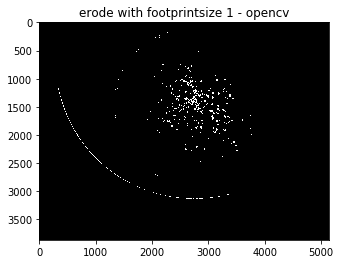

In [4]:
granulecheck = CannyPipeline(path + imgname, channel='blue')
result = granulecheck.run([120, 180], 3, 3, 1, 1)
# show the resulting image of the detected bubbles
granulecheck.plot()
# show the individual steps performed to get this result
granulecheck.what_have_i_done()

## example filtering with standard values

In [5]:
#calculate properties
marker_image, props = bubble_properties_calculate(result) 

{'min': 0.92}
{'max': 1.6, 'min': 0.2}


In [7]:
props.head()

,area,centroid,convex_area,equivalent_diameter,perimeter,convexity,circularity_reciprocal
label,,,,,,,
4,19,"(123.789473684, 2595.47368421)",22,4.918491,15.414214,1.232629,0.995129
11,8,"(140.5, 2951.5)",8,3.191538,8.000000,1.000000,0.636620
12,12,"(150.166666667, 2652.0)",14,3.908820,9.414214,1.274668,0.587729
13,7,"(151.714285714, 2782.28571429)",9,2.985411,6.207107,1.127740,0.437996
14,14,"(156.071428571, 2566.57142857)",18,4.222008,12.828427,1.091326,0.935425


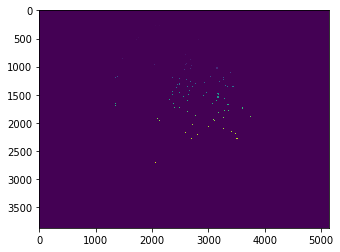

In [8]:
plt.imshow(marker_image)

## example filtering with custom values

<b> Changing the 'Circularity reciprocal' max value from 1.2 to 1.5 you can consider more circular particles and also the big ones are falling in

In [9]:
#calculate properties
marker_image, props = bubble_properties_calculate(result, 
                                                  rules={'convexity':{'min':0.}, 
                                                                 'circularity_reciprocal':{'max':1.5, 'min':0.3}}) 

{'max': 1.5, 'min': 0.3}
{'min': 0.0}


In [10]:
props.head()

,area,centroid,convex_area,equivalent_diameter,perimeter,convexity,circularity_reciprocal
label,,,,,,,
4,19,"(123.789473684, 2595.47368421)",22,4.918491,15.414214,1.232629,0.995129
6,4,"(124.25, 2824.0)",4,2.256758,4.621320,0.865554,0.424876
11,8,"(140.5, 2951.5)",8,3.191538,8.000000,1.000000,0.636620
12,12,"(150.166666667, 2652.0)",14,3.908820,9.414214,1.274668,0.587729
13,7,"(151.714285714, 2782.28571429)",9,2.985411,6.207107,1.127740,0.437996


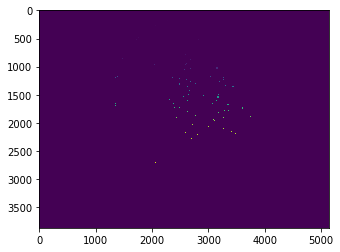

In [11]:
plt.imshow(marker_image)

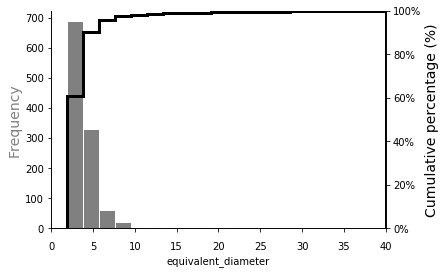

In [12]:
fig, axs = bubble_properties_plot(props, "equivalent_diameter")  # make a plot

# ADAPTIVE THRESHOLD PIPELINE

Steps undertaken since from raw image:
adaptive threshold bubble detection with blocksize 101 and cvalue 10 - opencv
dilate with footprintsize 2 - opencv
fill holes - opencv
clear border with buffer size 3 and bgval 1 -  skimage
erode with footprintsize 1 - opencv




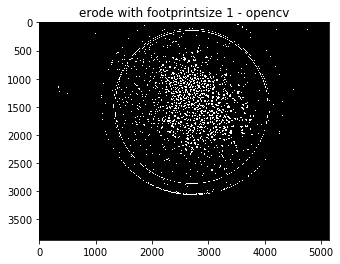

In [13]:
granulecheck = AdaptiveThresholdPipeline(path + imgname, channel='red')
result = granulecheck.run(101, 10, 2, 3, 1, 1)
# show the resulting image of the detected granules
granulecheck.plot()

# show the individual steps performed to get this result
granulecheck.what_have_i_done()

In [14]:
#calculate properties
marker_image, props = bubble_properties_calculate(result, 
                                                  rules={'convexity':{'min':0.}, 
                                                                 'circularity_reciprocal':{'max':1.2, 'min':0.3}}) 

{'max': 1.2, 'min': 0.3}
{'min': 0.0}


In [19]:
props.head()

,area,centroid,convex_area,equivalent_diameter,perimeter,convexity,circularity_reciprocal
label,,,,,,,
9,5,"(7.6, 2011.8)",5,2.523133,5.207107,0.960226,0.431532
12,7,"(8.28571428571, 3459.28571429)",11,2.985411,6.621320,1.057191,0.498404
14,7,"(8.28571428571, 3481.0)",7,2.985411,6.828427,1.025126,0.530070
24,8,"(9.125, 3488.875)",8,3.191538,7.414214,1.079009,0.546802
42,3,"(12.3333333333, 3479.33333333)",3,1.954410,3.414214,0.878680,0.309208


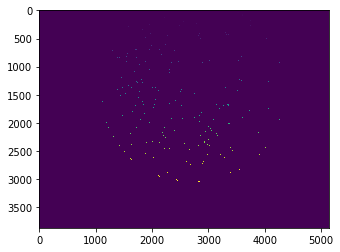

In [16]:
plt.imshow(marker_image)

# Custom pipeline

## Original image

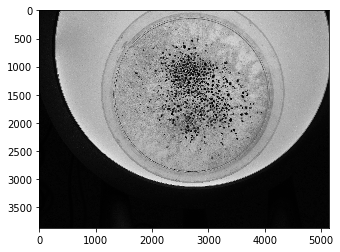

In [17]:
granulecheck = BubbleKicker(path + imgname, channel='blue')
granulecheck.plot();

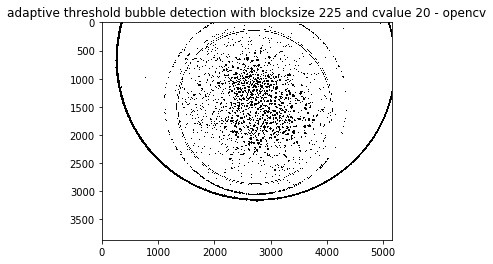

In [18]:
granulecheck.adaptive_threshold_opencv(225, 20)
granulecheck.plot();

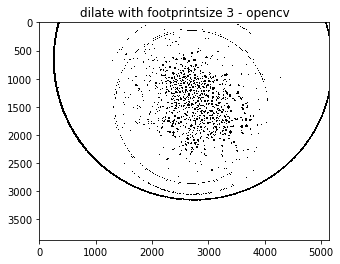

In [20]:
granulecheck.dilate_opencv(3)
granulecheck.plot();

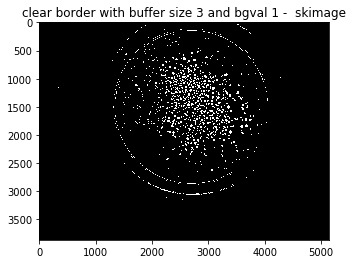

In [21]:
granulecheck.clear_border_skimage(3,1)
granulecheck.plot();

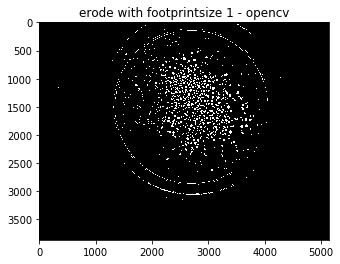

In [22]:
granulecheck.erode_opencv()
granulecheck.plot();

In [23]:
granulecheck.what_have_i_done()

Steps undertaken since from raw image:
adaptive threshold bubble detection with blocksize 225 and cvalue 20 - opencv
dilate with footprintsize 3 - opencv
clear border with buffer size 3 and bgval 1 -  skimage
erode with footprintsize 1 - opencv




## Calculate granules properties

In [24]:
# calcola le proprieta' dei blob nell'immagine
marker_image, props = bubble_properties_calculate(granulecheck.current_image,rules={'convexity': {'min':1.9}, #
                                                                 'circularity_reciprocal': {'max': 5, 'min': 0.2}});

{'max': 5, 'min': 0.2}
{'min': 1.9}


In [35]:
props.describe()

,area,convex_area,equivalent_diameter,perimeter,convexity,circularity_reciprocal,equivalent_diameter_mm,classe
count,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000
mean,575.169620,661.954430,24.499512,98.422021,4.894798,1.658999,0.499990,1.003797
std,516.460624,610.110001,11.500872,51.112306,2.356786,0.589130,0.234712,0.061545
min,42.000000,47.000000,7.312733,21.863961,1.900810,0.893383,0.149239,1.000000
25%,168.250000,211.500000,14.636331,58.472087,2.620225,1.279469,0.298701,1.000000
50%,428.000000,499.500000,23.344090,93.805087,4.629197,1.460694,0.476410,1.000000
75%,821.000000,920.000000,32.331558,125.497475,6.684771,1.847458,0.659828,1.000000
max,3118.000000,5312.000000,63.007626,432.113744,12.754487,4.765519,1.285870,2.000000


In [37]:
# definisce classi
def classe(equivalent_diameter_mm):
    if equivalent_diameter_mm >= 1.4:
        return 5 
    elif 1.2 <= equivalent_diameter_mm < 1.4:
        return 4
    elif 1. <= equivalent_diameter_mm < 1.2:
        return 3
    elif .8 <= equivalent_diameter_mm < 0.1:
        return 2
    elif equivalent_diameter_mm < 0.8:
        return 1

# aggiunge colonna con misura effettiva dei granuli
props['equivalent_diameter_mm'] = props['equivalent_diameter']/49
# aggiunge una colonnna 'classe' alle proprieta'
props['classe']=props["equivalent_diameter_mm"].apply(classe)
props

,area,centroid,convex_area,equivalent_diameter,perimeter,convexity,circularity_reciprocal,equivalent_diameter_mm,classe
label,,,,,,,,,
27,149,"(38.1543624161, 3529.24161074)",299,13.773623,75.006097,1.986505,3.004672,0.281094,1.0
61,119,"(77.9579831933, 3580.81512605)",173,12.309163,55.556349,2.141969,2.064004,0.251207,1.0
116,226,"(133.415929204, 3675.59292035)",430,16.963258,107.976659,2.093045,4.105268,0.346189,1.0
130,155,"(146.412903226, 1755.29032258)",248,14.048207,78.591883,1.972214,3.171128,0.286698,1.0
144,110,"(150.572727273, 3695.46363636)",133,11.834541,43.520815,2.527526,1.370224,0.241521,1.0
152,143,"(164.615384615, 1735.16783217)",200,13.493452,63.006097,2.269622,2.209120,0.275377,1.0
168,138,"(171.847826087, 2324.57971014)",232,13.255454,68.213203,2.023069,2.683168,0.270519,1.0
190,141,"(187.737588652, 2386.36879433)",189,13.398760,69.041631,2.042246,2.690253,0.273444,1.0
229,52,"(222.942307692, 2391.0)",60,8.136858,26.727922,1.945531,1.093244,0.166058,1.0


In [38]:
classi=props["equivalent_diameter_mm"].apply(classe)
props.count()

area                      790
centroid                  790
convex_area               790
equivalent_diameter       790
perimeter                 790
convexity                 790
circularity_reciprocal    790
equivalent_diameter_mm    790
classe                    724
dtype: int64

## Selected and classified granules

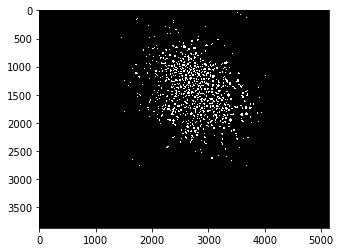

In [39]:
plt.imshow(marker_image>0, cmap='gray')

In [40]:
# conta per ogni classe quanti granuli ci sono
props[['equivalent_diameter_mm', 'classe']].groupby(['classe']).agg(['count'])

,equivalent_diameter_mm
,count
classe,
1.0,700
3.0,21
4.0,3


(None, <matplotlib.text.Text at 0x7f85a0974190>)

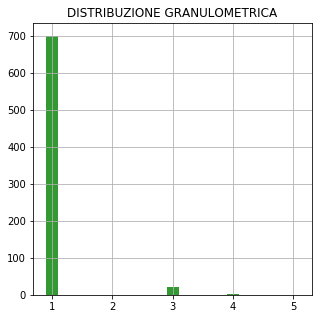

In [41]:
fig = plt.figure(figsize=(5,5));
plt.xticks([k for k in range(0,7)]);
classi.hist(bins = np.arange(1,7)-0.5, 
            rwidth=0.2, 
            color='green', 
            align='mid', 
            alpha=0.8); #rwidth =spessore barra #non riesco a mettere il numero al centro della barra

plt.grid('on'),plt.title('DISTRIBUZIONE GRANULOMETRICA')
# plt.savefig(path + '\\' + 'distribuzione_granulometrica.jpg',dpi=500)

In [42]:
# con questo archivi la posizione x e y e la classe di ogni centroide in tre variabili (x,y e cls)
x = []; y = []; cls = []
for i in props['centroid'].reset_index().index:
    x = np.append(x, props['centroid'].values[i][1])
    y = np.append(y, props['centroid'].values[i][0])
    cls = np.append(cls, props['classe'].values[i])

ValueError: cannot convert float NaN to integer

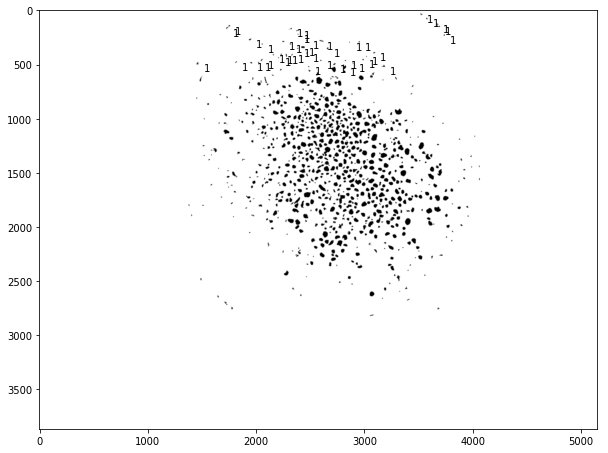

In [43]:
fig, ax1 = plt.subplots(figsize=(10,10))
# il maggiore di zero serve per fare tutti i pippoli neri, se lo levi diventa scala di grigi
ax1.imshow(marker_image>0, cmap='binary', interpolation='bilinear'); 
for i in np.arange(len(x)):
    ax1.annotate(str(int(cls[i])), xy=(x[i], y[i]), xytext=(x[i]+50, y[i]+70)); # possibile futuro miglioramento sara' visualizzare 